In [1]:
#INITIALISATION BLOCK
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns sns.set(style="darkgrid")
#from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
# LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
# MarkerCluster, Heatmap,SearchControl, 
# FullScreenControl)
#from ipywidgets import Text, HTML
#from branca.colormap import linear
import geopandas as gpd
#import json

In [31]:
#load Random20Radius30 Files
#C:\Users\richard\Pictures\AIScenariosPaper\random20radius30
datadir = 'network/random20radius30/'
files = [
    'rail_network_limitr_md20_r30_random_search_data_20220214_145334.csv',
    'rail_network_limitr_md20_r30_random_search_data_20220215_170753.csv',
    'rail_network_limitr_md20_r30_random_search_data_20220216_123039.csv',
    'rail_network_limitr_md20_r30_random_search_data_20220216_165604.csv'
]
#load and concatenate
df_list = [pd.read_csv(datadir+file) for file in files]
df_random20radius30 = pd.concat(df_list)
print( 'Random20Radius30: shape=', end='' )
print(df_random20radius30.shape)
df_random20radius30.head()

Random20Radius30: shape=(1200, 41)


,idx,score,depth,netChgRoad,netChgBus,netChgRail,netSavedMinsRoad,netSavedMinsBus,netSavedMinsRail,savedMinsRoad,...,gameState11,gameState12,gameState13,gameState14,gameState15,gameState16,gameState17,gameState18,gameState19,Unnamed: 40
0,0,-612.9948,20,0,0,1198159,0,0,340.01650,0,...,1417,1533,1435,3271,4794,4550,1275,7183,7107,
1,1,-757.2260,20,0,0,1202147,0,0,381.21396,0,...,4862,8241,7536,2646,1285,7496,7725,3910,3902,
2,2,-1438.5458,20,0,0,2902833,0,0,265.44960,0,...,6952,7990,7585,7196,1151,1076,1340,8316,7912,
3,3,-587.1724,20,0,0,717481,0,0,274.68082,0,...,6584,5998,2856,1289,999,6822,6804,5889,5884,
4,4,-982.1643,20,0,0,1445666,0,0,267.04443,0,...,7855,6058,6078,106,6658,3519,6489,2149,2009,


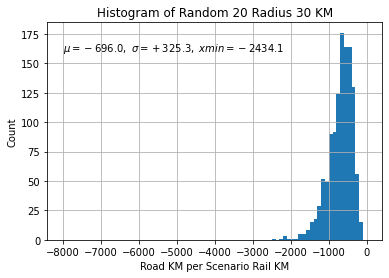

In [32]:
#plot histogram of data
#deltaLkRoad or usually scatter of deltaLkRoad vs railNetworkKM
#alternatively, deltaLkRoad/railNetworkKM is normalised deltaLkPerKM
#n, bins, patches = plt.hist(df_random20radius30.deltaLkRoad, 100, density=True )
n, bins, patches = plt.hist(df_random20radius30.deltaLkRoad/df_random20radius30.railNetworkKM, 80, range=(-8000,0), density=False)
#stats
mu = np.mean(df_random20radius30.deltaLkRoad/df_random20radius30.railNetworkKM)
sigma = np.std(df_random20radius30.deltaLkRoad/df_random20radius30.railNetworkKM)
datamin = np.min(df_random20radius30.deltaLkRoad/df_random20radius30.railNetworkKM)
#formatting
plt.xlabel('Road KM per Scenario Rail KM')
plt.ylabel('Count')
plt.title('Histogram of Random 20 Radius 30 KM')
plt.text(-8000, 160, r'$\mu={:+.1f},\ \sigma={:+.1f},\ xmin={:+.1f}$'.format(mu,sigma,datamin))
plt.grid(True)
plt.savefig('hist_rnd20r30.jpg')
plt.show()

In [33]:
#load RandomRibbon20Radius30 Files
#C:\Users\richard\Pictures\AIScenariosPaper\randomribbon20radius30
datadir = 'network/randomribbon20radius30/'
files = [
    'rail_network_ribbon_md20_r30_random_search_data_20220225_160806.csv',
    'rail_network_ribbon_md20_r30_random_search_data_20220228_104409.csv',
    'rail_network_ribbon_md20_r30_random_search_data_20220228_170842.csv',
    'rail_network_ribbon_md20_r30_random_search_data_20220301_090920.csv'
]
#load and concatenate
df_list = [pd.read_csv(datadir+file) for file in files]
df_randomribbon20radius30 = pd.concat(df_list)
print( 'RandomRibbon20Radius30: shape=', end='' )
print(df_randomribbon20radius30.shape)
df_randomribbon20radius30.head()

RandomRibbon20Radius30: shape=(1200, 41)


,idx,score,depth,netChgRoad,netChgBus,netChgRail,netSavedMinsRoad,netSavedMinsBus,netSavedMinsRail,savedMinsRoad,...,gameState11,gameState12,gameState13,gameState14,gameState15,gameState16,gameState17,gameState18,gameState19,Unnamed: 40
0,0,-938.52435,20,0,0,4963631,0,0,316.91394,0,...,5996.0,5996,1220.0,1220,5278.0,5278,2884.0,2884,5254.0,
1,1,-252.90640,20,0,0,359775,0,0,449.99942,0,...,3671.0,3671,5860.0,5860,4542.0,4542,1263.0,1263,1267.0,
2,2,-406.73990,20,0,0,369988,0,0,299.22162,0,...,3613.0,3613,3626.0,3626,5517.0,5517,5248.0,5248,5258.0,
3,3,-244.08113,20,0,0,343391,0,0,570.36633,0,...,3664.0,3664,3674.0,3674,3720.0,3720,3367.0,3367,6221.0,
4,4,-1440.78480,20,0,0,2741091,0,0,296.76797,0,...,4578.0,4578,3390.0,3390,3379.0,3379,3230.0,3230,4544.0,


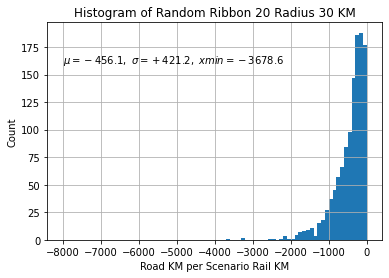

In [34]:
#plot random ribbon histogram
n, bins, patches = plt.hist(df_randomribbon20radius30.deltaLkRoad/df_randomribbon20radius30.railNetworkKM, 80, range=(-8000,0), density=False)
#stats
mu = np.mean(df_randomribbon20radius30.deltaLkRoad/df_randomribbon20radius30.railNetworkKM)
sigma = np.std(df_randomribbon20radius30.deltaLkRoad/df_randomribbon20radius30.railNetworkKM)
datamin = np.min(df_randomribbon20radius30.deltaLkRoad/df_randomribbon20radius30.railNetworkKM)
#formatting
plt.xlabel('Road KM per Scenario Rail KM')
plt.ylabel('Count')
plt.title('Histogram of Random Ribbon 20 Radius 30 KM')
plt.text(-8000, 160, r'$\mu={:+.1f},\ \sigma={:+.1f},\ xmin={:+.1f}$'.format(mu,sigma,datamin))
plt.grid(True)
plt.savefig('hist_rndribbon20r30.jpg')
plt.show()

In [35]:
#load RandomDense20Radius30 Files
#C:\Users\richard\Pictures\AIScenariosPaper\randomdense20radius30
datadir = 'network/randomdense20radius30/'
files = [
    'rail_network_dense_md20_r30_random_search_data_20220218_162942.csv',
    'rail_network_dense_md20_r30_random_search_data_20220219_083848.csv',
    'rail_network_dense_md20_r30_random_search_data_20220219_110400.csv',
    'rail_network_dense_md20_r30_random_search_data_20220219_132743.csv'
]
#load and concatenate
df_list = [pd.read_csv(datadir+file) for file in files]
df_randomdense20radius30 = pd.concat(df_list)
print( 'RandomDense20Radius30: shape=', end='' )
print(df_randomdense20radius30.shape)
df_randomdense20radius30.head()

RandomDense20Radius30: shape=(1200, 41)


,idx,score,depth,netChgRoad,netChgBus,netChgRail,netSavedMinsRoad,netSavedMinsBus,netSavedMinsRail,savedMinsRoad,...,gameState11,gameState12,gameState13,gameState14,gameState15,gameState16,gameState17,gameState18,gameState19,Unnamed: 40
0,0,-35.045563,20,0,0,1691403,0,0,394.76670,0,...,7324.0,7412,7321.0,7406.0,7309.0,7322,7320.0,7249,7316.0,
1,1,-95.754020,20,0,0,521445,0,0,260.91870,0,...,3933.0,3934,3921.0,1191.0,3927.0,3917,3921.0,3915,3951.0,
2,2,-79.833920,20,0,0,202413,0,0,347.15833,0,...,3950.0,3923,1187.0,3936.0,3933.0,3925,3951.0,3915,3933.0,
3,3,-475.485140,20,0,0,671512,0,0,257.43890,0,...,2303.0,2298,2335.0,2313.0,5645.0,2265,2329.0,6709,2430.0,
4,4,-263.506380,20,0,0,507912,0,0,447.17157,0,...,2597.0,1898,1841.0,2593.0,1878.0,2554,4249.0,2599,2598.0,


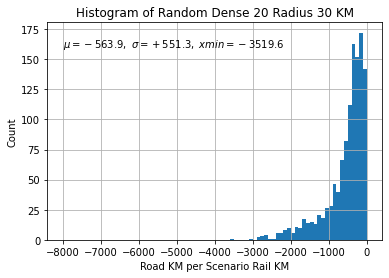

In [36]:
#plot random dense histogram
n, bins, patches = plt.hist(df_randomdense20radius30.deltaLkRoad/df_randomdense20radius30.railNetworkKM, 80, range=(-8000,0), density=False)
#stats
mu = np.mean(df_randomdense20radius30.deltaLkRoad/df_randomdense20radius30.railNetworkKM)
sigma = np.std(df_randomdense20radius30.deltaLkRoad/df_randomdense20radius30.railNetworkKM)
datamin = np.min(df_randomdense20radius30.deltaLkRoad/df_randomdense20radius30.railNetworkKM)
#formatting
plt.xlabel('Road KM per Scenario Rail KM')
plt.ylabel('Count')
plt.title('Histogram of Random Dense 20 Radius 30 KM')
plt.text(-8000, 160, r'$\mu={:+.1f},\ \sigma={:+.1f},\ xmin={:+.1f}$'.format(mu,sigma,datamin))
plt.grid(True)
plt.savefig('hist_rnddenso20r30.jpg')
plt.show()

In [37]:
#load RandomStar20Radius30 Files
#C:\Users\richard\Pictures\AIScenariosPaper\randomstar20radius30
datadir = 'network/randomstar20radius30/'
files = [
    'rail_network_star_md20_r30_random_search_data_20220221_123921.csv',
    'rail_network_star_md20_r30_random_search_data_20220221_153919.csv',
    'rail_network_star_md20_r30_random_search_data_20220221_184536.csv',
    'rail_network_star_md20_r30_random_search_data_20220222_082454.csv'
]
#load and concatenate
df_list = [pd.read_csv(datadir+file) for file in files]
df_randomstar20radius30 = pd.concat(df_list)
print( 'RandomStar20Radius30: shape=', end='' )
print(df_randomstar20radius30.shape)
df_randomstar20radius30.head()

RandomStar20Radius30: shape=(1200, 41)


,idx,score,depth,netChgRoad,netChgBus,netChgRail,netSavedMinsRoad,netSavedMinsBus,netSavedMinsRail,savedMinsRoad,...,gameState11,gameState12,gameState13,gameState14,gameState15,gameState16,gameState17,gameState18,gameState19,Unnamed: 40
0,0,-83.192720,20,0,0,1073863,0,0,470.00452,0,...,8411.0,7725,7584.0,7725,8416.0,7725.0,7361.0,7725.0,7555.0,
1,1,-4516.049300,20,0,0,5939337,0,0,222.78851,0,...,574.0,838,663.0,838,292.0,838.0,599.0,838.0,474.0,
2,2,-20.661161,20,0,0,248352,0,0,570.33790,0,...,3751.0,5341,5340.0,5341,3753.0,5341.0,5348.0,5341.0,5435.0,
3,3,-2390.902800,20,0,0,7404139,0,0,276.34985,0,...,232.0,209,405.0,209,61.0,209.0,832.0,209.0,59.0,
4,4,-277.366600,20,0,0,1077229,0,0,238.79518,0,...,7784.0,8351,7867.0,8351,8292.0,8351.0,7886.0,8351.0,7830.0,


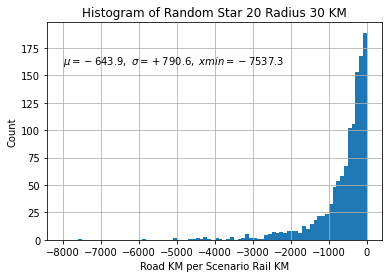

In [38]:
#plot random star histogram
n, bins, patches = plt.hist(df_randomstar20radius30.deltaLkRoad/df_randomstar20radius30.railNetworkKM, 80, range=(-8000,0), density=False)
#stats
mu = np.mean(df_randomstar20radius30.deltaLkRoad/df_randomstar20radius30.railNetworkKM)
sigma = np.std(df_randomstar20radius30.deltaLkRoad/df_randomstar20radius30.railNetworkKM)
datamin = np.min(df_randomstar20radius30.deltaLkRoad/df_randomstar20radius30.railNetworkKM)
#formatting
plt.xlabel('Road KM per Scenario Rail KM')
plt.ylabel('Count')
plt.title('Histogram of Random Star 20 Radius 30 KM')
plt.text(-8000, 160, r'$\mu={:+.1f},\ \sigma={:+.1f},\ xmin={:+.1f}$'.format(mu,sigma,datamin))
plt.grid(True)
plt.savefig('hist_rndstar20r30.jpg')
plt.show()

In [39]:
#load RandomWalk20Radius30 Files
#C:\Users\richard\Pictures\AIScenariosPaper\randomwalk20radius30
datadir = 'network/randomwalk20radius30/'
files = [
    'rail_network_rndwalk_md20_r30_random_search_data_20220217_142258.csv',
    'rail_network_rndwalk_md20_r30_random_search_data_20220219_164218.csv',
    'rail_network_rndwalk_md20_r30_random_search_data_20220219_194054.csv',
    'rail_network_rndwalk_md20_r30_random_search_data_20220220_091111.csv',
    'rail_network_rndwalk_md20_r30_random_search_data_20220220_114044.csv'
]
#load and concatenate
df_list = [pd.read_csv(datadir+file) for file in files]
df_randomwalk20radius30 = pd.concat(df_list)
print( 'RandomWalk20Radius30: shape=', end='' )
print(df_randomwalk20radius30.shape)
df_randomwalk20radius30.head()

RandomWalk20Radius30: shape=(1496, 41)


,idx,score,depth,netChgRoad,netChgBus,netChgRail,netSavedMinsRoad,netSavedMinsBus,netSavedMinsRail,savedMinsRoad,...,gameState11,gameState12,gameState13,gameState14,gameState15,gameState16,gameState17,gameState18,gameState19,Unnamed: 40
0,0,-398.29495,20,0,0,1215423,0,0,276.58820,0,...,1892,1892,1848.0,1848.0,5595.0,5595.0,1815.0,1815.0,1792.0,
1,1,-2382.23400,20,0,0,2439564,0,0,262.47977,0,...,685,685,6258.0,6258.0,564.0,564.0,128.0,128.0,149.0,
2,2,-576.67890,20,0,0,845884,0,0,362.20950,0,...,5515,5515,5541.0,5541.0,3491.0,3491.0,3637.0,3637.0,3614.0,
3,3,-1729.78260,20,0,0,4250346,0,0,349.76093,0,...,6653,6653,6202.0,6202.0,490.0,490.0,537.0,537.0,207.0,
4,4,-99.96985,20,0,0,222120,0,0,320.90880,0,...,5463,5463,5459.0,5459.0,5404.0,5404.0,5413.0,5413.0,5457.0,


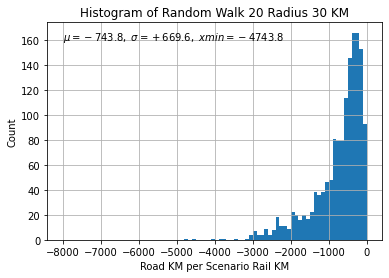

In [40]:
#plot random walk histogram - NOTE: technically random_rndwalk
n, bins, patches = plt.hist(df_randomwalk20radius30.deltaLkRoad/df_randomwalk20radius30.railNetworkKM, 80, range=(-8000,0), density=False)
#stats
mu = np.mean(df_randomwalk20radius30.deltaLkRoad/df_randomwalk20radius30.railNetworkKM)
sigma = np.std(df_randomwalk20radius30.deltaLkRoad/df_randomwalk20radius30.railNetworkKM)
datamin = np.min(df_randomwalk20radius30.deltaLkRoad/df_randomwalk20radius30.railNetworkKM)
#formatting
plt.xlabel('Road KM per Scenario Rail KM')
plt.ylabel('Count')
plt.title('Histogram of Random Walk 20 Radius 30 KM')
plt.text(-8000, 160, r'$\mu={:+.1f},\ \sigma={:+.1f},\ xmin={:+.1f}$'.format(mu,sigma,datamin))
plt.grid(True)
plt.savefig('hist_rndwalk20r30.jpg')
plt.show()

In [41]:
#load Random20NoLimit Files
#C:\Users\richard\Pictures\AIScenariosPaper\sizetest-nolimit\random20
datadir = 'network/sizetest-nolimit/random20/'
files = [
    'rail_network_20_random_search_data_20220202_165529.csv',
    'rail_network_20_random_search_data_20220203_090647.csv',
    'rail_network_20_random_search_data_20220203_121156.csv',
    'rail_network_20_random_search_data_20220203_153311.csv'
]
#load and concatenate
df_list = [pd.read_csv(datadir+file) for file in files]
df_random20 = pd.concat(df_list)
print( 'Random20: shape=', end='' )
print(df_random20.shape)
df_random20.head()

Random20: shape=(1200, 37)


,score,depth,netChgRoad,netChgBus,netChgRail,savedMinsRoad,savedMinsBus,savedMinsRail,deltaDkRoad,deltaDkBus,...,gameState11,gameState12,gameState13,gameState14,gameState15,gameState16,gameState17,gameState18,gameState19,Unnamed: 36
0,-76.203330,20,0,0,18950538,0,0,535850780.0,-10126.740148,-2282.558622,...,789,1031,7602,6931,4729,1893,4039,2953,3307,
1,-151.241800,20,0,0,23376161,0,0,672339460.0,-17478.148222,-5274.342859,...,2945,2761,7859,1458,4911,6030,1598,404,1950,
2,-54.877730,20,0,0,23463195,0,0,856273500.0,-8180.970847,-2709.030344,...,6753,6392,5950,4815,401,88,5908,4477,5733,
3,-18.480991,20,0,0,10511522,0,0,249155440.0,-2661.497563,-1233.942563,...,295,3635,1002,3870,1851,5531,2231,4422,5886,
4,-43.834730,20,0,0,8780861,0,0,187944130.0,-4712.542211,-1724.686664,...,122,5556,3106,5747,1796,1844,4341,5484,6766,


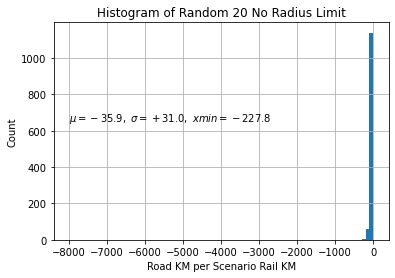

In [42]:
#plot random 20 histogram - NO RADIUS LIMIT!
n, bins, patches = plt.hist(df_random20.deltaLkRoad/df_random20.railNetworkKM, 80, range=(-8000,0), density=False)
#stats
mu = np.mean(df_random20.deltaLkRoad/df_random20.railNetworkKM)
sigma = np.std(df_random20.deltaLkRoad/df_random20.railNetworkKM)
datamin = np.min(df_random20.deltaLkRoad/df_random20.railNetworkKM)
#formatting
plt.xlabel('Road KM per Scenario Rail KM')
plt.ylabel('Count')
plt.title('Histogram of Random 20 No Radius Limit')
plt.text(-8000, 650, r'$\mu={:+.1f},\ \sigma={:+.1f},\ xmin={:+.1f}$'.format(mu,sigma,datamin))
plt.grid(True)
plt.savefig('hist_rnd20nolimit.jpg')
plt.show()

# Geography Section

AllFiles20: shape=(6296, 41)
skip count=4579 parsed 120760 gamestates


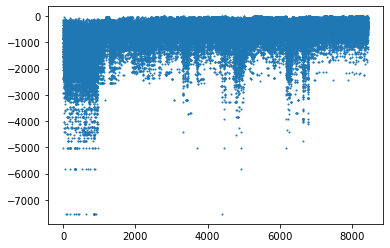

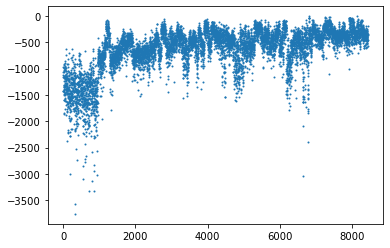

In [29]:
datadir = 'network/'
allFiles = [
    'random20radius30/rail_network_limitr_md20_r30_random_search_data_20220214_145334.csv',
    'random20radius30/rail_network_limitr_md20_r30_random_search_data_20220215_170753.csv',
    'random20radius30/rail_network_limitr_md20_r30_random_search_data_20220216_123039.csv',    
    'random20radius30/rail_network_limitr_md20_r30_random_search_data_20220216_165604.csv',
    
    'randomribbon20radius30/rail_network_ribbon_md20_r30_random_search_data_20220225_160806.csv',
    'randomribbon20radius30/rail_network_ribbon_md20_r30_random_search_data_20220228_104409.csv',
    'randomribbon20radius30/rail_network_ribbon_md20_r30_random_search_data_20220228_170842.csv',
    'randomribbon20radius30/rail_network_ribbon_md20_r30_random_search_data_20220301_090920.csv',
    
    'randomdense20radius30/rail_network_dense_md20_r30_random_search_data_20220218_162942.csv',
    'randomdense20radius30/rail_network_dense_md20_r30_random_search_data_20220219_083848.csv',
    'randomdense20radius30/rail_network_dense_md20_r30_random_search_data_20220219_110400.csv',
    'randomdense20radius30/rail_network_dense_md20_r30_random_search_data_20220219_132743.csv',
    
    'randomstar20radius30/rail_network_star_md20_r30_random_search_data_20220221_123921.csv',
    'randomstar20radius30/rail_network_star_md20_r30_random_search_data_20220221_153919.csv',
    'randomstar20radius30/rail_network_star_md20_r30_random_search_data_20220221_184536.csv',
    'randomstar20radius30/rail_network_star_md20_r30_random_search_data_20220222_082454.csv',
    
    'randomwalk20radius30/rail_network_rndwalk_md20_r30_random_search_data_20220217_142258.csv',
    'randomwalk20radius30/rail_network_rndwalk_md20_r30_random_search_data_20220219_164218.csv',
    'randomwalk20radius30/rail_network_rndwalk_md20_r30_random_search_data_20220219_194054.csv',
    'randomwalk20radius30/rail_network_rndwalk_md20_r30_random_search_data_20220220_091111.csv',
    'randomwalk20radius30/rail_network_rndwalk_md20_r30_random_search_data_20220220_114044.csv'
]
#load and concatenate
#dtype={
#    'gameState0':dtype.str,'gameState1':dtype.str,'gameState2':dtype.str,'gameState3':dtype.str,'gameState4':dtype.str,
#    'gameState5':dtype.str,'gameState6':dtype.str,'gameState7':dtype.str,'gameState8':dtype.str,'gameState9':dtype.str,
#    'gameState10':dtype.str,'gameState11':dtype.str,'gameState12':dtype.str,'gameState13':dtype.str,'gameState14':dtype.str,
#    'gameState15':dtype.str,'gameState16':dtype.str,'gameState17':dtype.str,'gameState18':dtype.str,'gameState19':dtype.str,
#    'gameState20':dtype.str}
df_list = [pd.read_csv(datadir+file) for file in allFiles]
df_allfiles20 = pd.concat(df_list)
print( 'AllFiles20: shape=', end='' )
print(df_allfiles20.shape)
#df_allfiles20.head()
#now what? it's the game states and scores that we want
#need deltaLkRoad/railNetworkKM and gamestates 0..19
#this is really bad, but can't think of any other way of breaking the gamestate data out...
#interate over all rows in the allfiles dataframe
data = [] #list of zonei,score tuples
skipcount=0
for row in df_allfiles20.itertuples(index=False):
    deltaLkRoad = row.deltaLkRoad
    railNetworkKM = row.railNetworkKM
    score=0
    if (railNetworkKM>0):
        score = deltaLkRoad/railNetworkKM
    for d in range(0,20):
        zonei = row[df_allfiles20.columns.get_loc('gameState'+str(d))]
        if (type(zonei) is str): #really bad! blasted python, some of the gs cols are interpreted as str and some as int!
            zonei=zonei.strip()
            if (len(zonei)==0):
                continue #missing value
        #end if
        try:
            zonei=int(zonei)
            data.append([zonei,score])
        except:
            #print("SKIP: "+str(zonei)+" "+str(score))
            skipcount+=1
        #end try except
##end for row
print('skip count='+str(skipcount)+' parsed '+str(len(data))+' gamestates')
df_gamestate = pd.DataFrame(data,columns=['zonei','roadkm_per_networkKM'])
#SAVE FILE HERE! this is all the gamestate data
df_gamestate.to_csv('df_gamestate.csv')
#df_gamestate.head()
#OK, now how on earth am I going to visualise this?
#we have a dt of zonei,score where zonei is duplicated with different scores
#so it's a group by zonei and compute mean?

#scatter plot
plt.scatter(df_gamestate.zonei,df_gamestate.roadkm_per_networkKM,s=1)
plt.show()

#mean plot
df_gs_grouped = df_gamestate.groupby('zonei')
df_gs_mean = df_gs_grouped.mean()
#df_gs_mean.reset_index()
#print(df_gs_mean.shape)
#df_gs_mean.head()
#zonei col becomes the index col, so we need to use that name - why?!
#print(df_gs_mean.columns)
plt.scatter(df_gs_mean.index,df_gs_mean.roadkm_per_networkKM,s=1)
plt.savefig('gamestate_roadkm_pre_networkKM_mean.jpg')
plt.show()

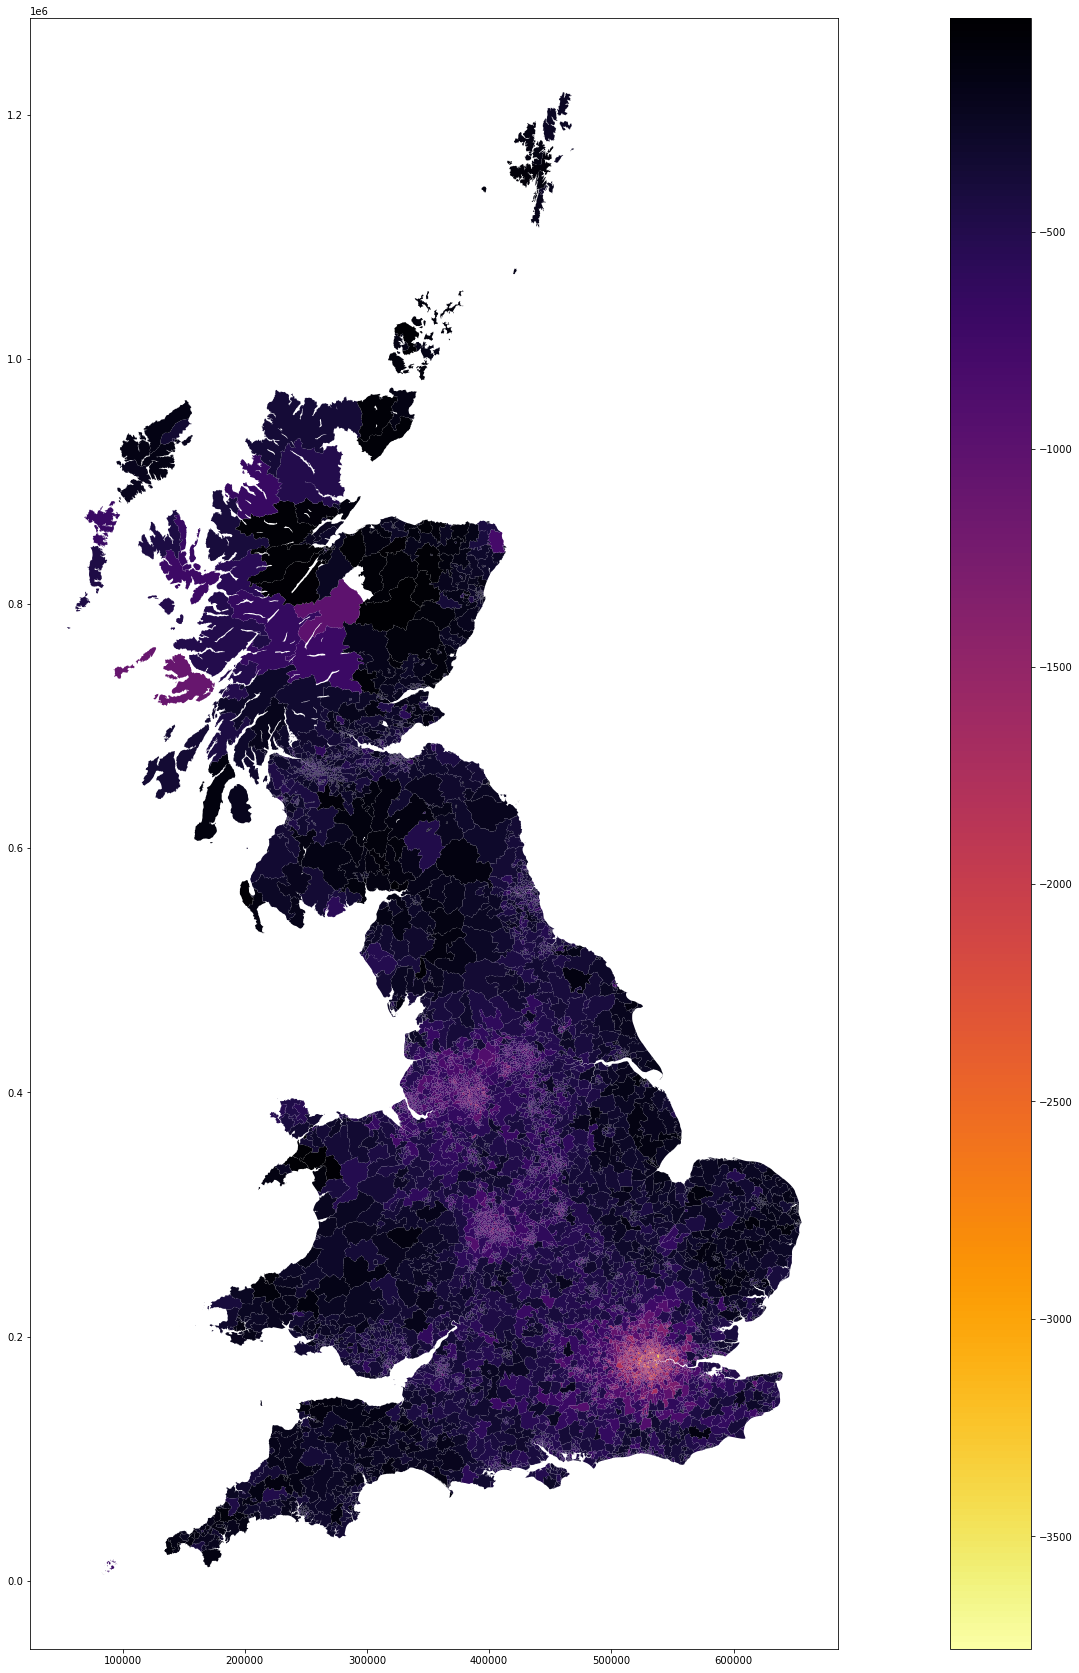

In [27]:
df_gs_mean.head()
zonecodes = pd.read_csv('C:\\richard\\github\\QUANT_RUBICON\\data\\ZoneCodesText.csv')
##join zonei with zonecodes to get areakey
#JOIN: df_gs_mean.index is called zonei, which matches = zonecodes.zonei
dfMapData = pd.merge(zonecodes,df_gs_mean,on='zonei')
#dfMapData.head()
#load shapefile and then join
msoaiz = gpd.read_file('C:\\Users\\richard\\Documents\\geography\\EnglandWalesScotland_IZ_MSOA_2011.shp')
#msoaiz.head()
#rename the map data containing the mean so the area key matches shapefile
dfMapData = dfMapData.rename({'areakey': 'msoa_iz'}, axis=1)
msoaiz = pd.merge(msoaiz, dfMapData, how='inner', on='msoa_iz')
#msoaiz.head()
#msoaiz.to_file('df_gs_mean.shp') #save it!
#data field to plot is roadkm_per_networkKM
#https://matplotlib.org/2.0.2/users/colormaps.html NOTE _r on end to reverse
#OrRd viridis plasma inferno magma rainbow YlGn Greens copper seismic gist_ncar gist_rainbow
uk = msoaiz.plot(column='roadkm_per_networkKM',cmap='inferno_r',figsize=(40, 30),legend=True)
plt.savefig('df_gs_mean_map.jpg')
